# Overview and Correlation of Metrics

In [1]:
import pandas as pd

df_alternation = pd.read_csv("outputs/alternation_scores.csv", index_col=0)
df_coherence = pd.read_csv("outputs/coherence_scores.csv", index_col=0)
df_density = pd.read_csv("outputs/information_density.csv", index_col=0)
df_readability = pd.read_csv("outputs/readability_scores.csv", index_col=0)
df_sparql_proficiency = pd.read_csv("outputs/sparql_proficiency_new.csv", index_col=0)

# Merge on 'story_id'
dfs = [df_alternation, df_coherence, df_density, df_readability, df_sparql_proficiency]
df_merged = dfs[0]
for df in dfs[1:]:
    df_merged = df_merged.merge(df, on="story_id", how="inner")

df_merged = df_merged.rename(columns={
    "story_id": "Story ID",
    "alternation_score": "Alternation Score",
    "coherence_score": "Coherence Score",
    "information_density": "Information Density",
    "flesch_reading_ease": "Flesch Reading Ease",
    "flesch_reading_ease": "Readability",
    "sparql_proficiency": "SPARQL Proficiency"

})

story_no_text = ['SXefpzf4', 'EzsIH_Et', '6yGct8pP']

df_merged = df_merged[~df_merged['Story ID'].isin(story_no_text)]

df_merged.to_csv("outputs/merged_story_metrics.csv", index=False)
df_merged.head()

,Story ID,Alternation Score,Coherence Score,info_density_token,info_density_sentence,token_norm,sentence_norm,Information Density,Readability,normalized_readability,combined_normalized,corret_normalized,federated_bonus,normalized_sparql_feature_metric,diversity_metric,SPARQL Proficiency
0,D-hp3wDV,0.700000,0.474177,0.272609,3.472177,0.799237,0.784433,0.790355,33.14,0.063805,1.0,1.0,0.0,0.635359,0.163043,0.419361
1,y4Srva15,0.400000,0.607225,0.313834,3.033724,0.920100,0.685378,0.779267,51.18,0.292764,1.0,1.0,0.0,0.344751,0.139130,0.293553
2,7qpfziir,0.928571,0.400856,0.301631,2.959752,0.884324,0.668666,0.754929,61.36,0.533948,1.0,1.0,0.0,0.470116,0.142292,0.344963
3,Nokx0yU6,0.666667,0.448644,0.301749,3.218657,0.884671,0.727158,0.790163,49.15,0.252561,1.0,1.0,0.0,0.220994,0.101449,0.228978
4,gz_gxhYn,0.928571,0.485120,0.252586,3.466048,0.740535,0.783048,0.766043,41.70,0.138238,1.0,1.0,0.0,0.462079,0.130435,0.337006


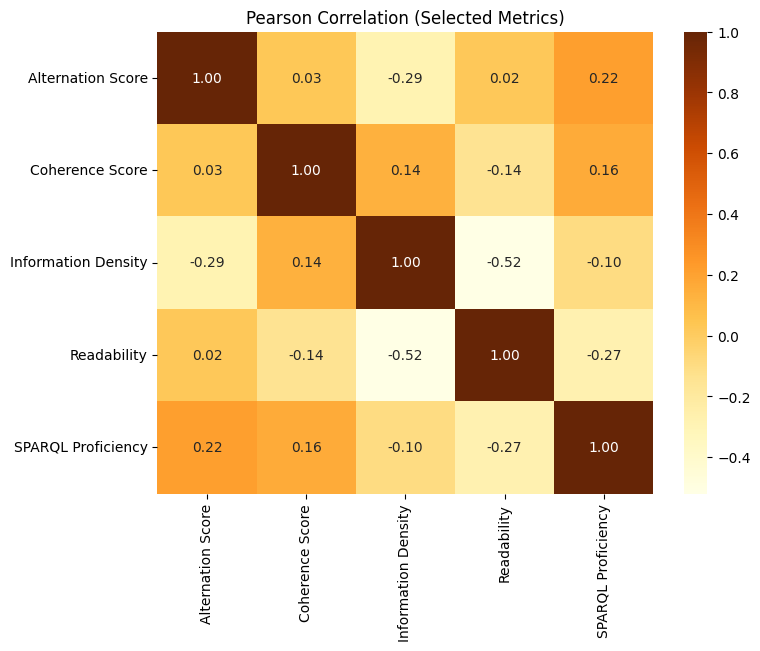

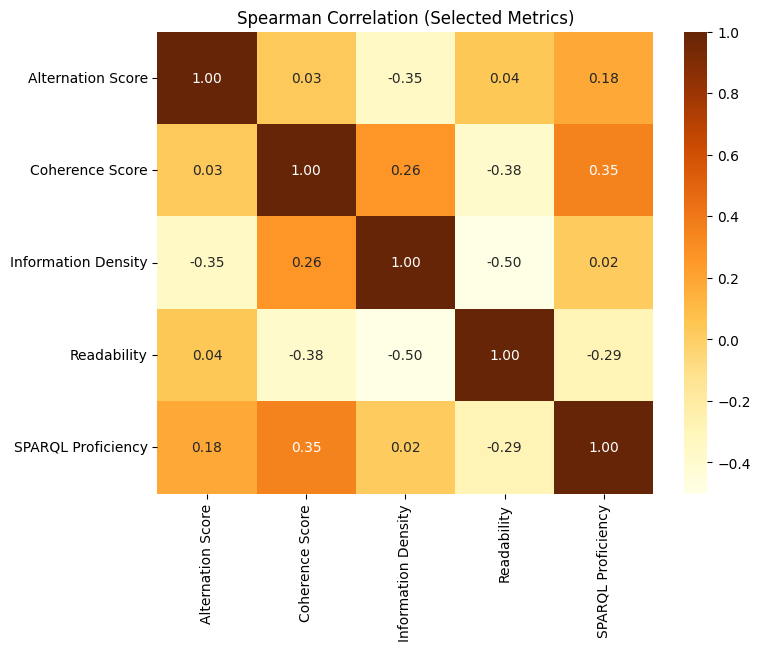

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset only the relevant columns
subset_cols = [
    'Alternation Score',
    'Coherence Score',
    'Information Density',
    'Readability',
    'SPARQL Proficiency'
]

# Compute correlation matrices (Pearson and Spearman)
subset_pearson = df_merged[subset_cols].corr(method='pearson')
subset_spearman = df_merged[subset_cols].corr(method='spearman')

# Plot Pearson heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(subset_pearson, annot=True, cmap="YlOrBr", fmt=".2f")
plt.title("Pearson Correlation (Selected Metrics)")
plt.show()

# Plot Spearman heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(subset_spearman, annot=True, cmap="YlOrBr", fmt=".2f")
plt.title("Spearman Correlation (Selected Metrics)")
plt.show()


In [18]:
from scipy.stats import pearsonr, spearmanr
import pandas as pd
from itertools import combinations

# Select only the relevant subset
subset = df_merged[[
    'Alternation Score',
    'Coherence Score',
    'Information Density',
    'Readability',
    'SPARQL Proficiency'
]]

# Initialize storage
results = []

# Iterate over all combinations of metric pairs
for col1, col2 in combinations(subset.columns, 2):
    pearson_corr, pearson_p = pearsonr(subset[col1], subset[col2])
    spearman_corr, spearman_p = spearmanr(subset[col1], subset[col2])
    
    results.append({
        "Metric 1": col1,
        "Metric 2": col2,
        "Pearson Correlation": pearson_corr,
        "Pearson p-value": pearson_p,
        "Spearman Correlation": spearman_corr,
        "Spearman p-value": spearman_p,
    })

correlation_results = pd.DataFrame(results)
correlation_results.to_csv("outputs/correlation_summary.csv", index=False)


In [19]:
# Show only statistically significant correlations (p < 0.05)
significant_corrs = correlation_results[
    (correlation_results["Pearson p-value"] < 0.05) |
    (correlation_results["Spearman p-value"] < 0.05)
]
print(significant_corrs)


              Metric 1             Metric 2  Pearson Correlation  \
1    Alternation Score  Information Density            -0.286340   
5      Coherence Score          Readability            -0.140694   
6      Coherence Score   SPARQL Proficiency             0.159519   
7  Information Density          Readability            -0.519722   
9          Readability   SPARQL Proficiency            -0.272650   

   Pearson p-value  Spearman Correlation  Spearman p-value  
1         0.048489             -0.352136          0.014106  
5         0.340176             -0.384020          0.007047  
6         0.278808              0.349978          0.014750  
7         0.000153             -0.501371          0.000283  
9         0.060810             -0.289739          0.045768  


In [20]:
# Sort by absolute Pearson correlation strength
correlation_results.sort_values(by="Pearson Correlation", key=abs, ascending=False)

# Or by Spearman
correlation_results.sort_values(by="Spearman Correlation", key=abs, ascending=False)


,Metric 1,Metric 2,Pearson Correlation,Pearson p-value,Spearman Correlation,Spearman p-value
7,Information Density,Readability,-0.519722,0.000153,-0.501371,0.000283
5,Coherence Score,Readability,-0.140694,0.340176,-0.384020,0.007047
1,Alternation Score,Information Density,-0.286340,0.048489,-0.352136,0.014106
6,Coherence Score,SPARQL Proficiency,0.159519,0.278808,0.349978,0.014750
9,Readability,SPARQL Proficiency,-0.272650,0.060810,-0.289739,0.045768
4,Coherence Score,Information Density,0.138363,0.348315,0.264655,0.069093
3,Alternation Score,SPARQL Proficiency,0.215838,0.140647,0.181018,0.218222
2,Alternation Score,Readability,0.024740,0.867440,0.040034,0.787038
0,Alternation Score,Coherence Score,0.030144,0.838833,0.031765,0.830291
8,Information Density,SPARQL Proficiency,-0.095607,0.518015,0.018346,0.901504


In [21]:
import pandas as pd

df = pd.read_csv("outputs/correlation_summary.csv")

# Add significance flag
df["Significant"] = (
    (df["Pearson p-value"] < 0.05) | (df["Spearman p-value"] < 0.05)
)

# Optional: round for clean display
df_annotated = df.copy()
df_annotated[[
    "Pearson Correlation", "Pearson p-value",
    "Spearman Correlation", "Spearman p-value"
]] = df_annotated[[
    "Pearson Correlation", "Pearson p-value",
    "Spearman Correlation", "Spearman p-value"
]].round(3)

# Optional: reorder columns
df_annotated = df_annotated[[
    "Metric 1", "Metric 2",
    "Pearson Correlation", "Pearson p-value",
    "Spearman Correlation", "Spearman p-value",
    "Significant"
]]

df_annotated.to_csv("outputs/correlation_report_annotated.csv", index=False)
df_annotated.head()


,Metric 1,Metric 2,Pearson Correlation,Pearson p-value,Spearman Correlation,Spearman p-value,Significant
0,Alternation Score,Coherence Score,0.030,0.839,0.032,0.830,False
1,Alternation Score,Information Density,-0.286,0.048,-0.352,0.014,True
2,Alternation Score,Readability,0.025,0.867,0.040,0.787,False
3,Alternation Score,SPARQL Proficiency,0.216,0.141,0.181,0.218,False
4,Coherence Score,Information Density,0.138,0.348,0.265,0.069,False
